In [2]:
from graph_tool.all import *
import time
import os

In [ ]:
from GithubGraphML.parsing.loading import load_csv_graph, combine_graphs
data_dir = './'
lang = 'Pascal'

# Simple Community Detection

In [4]:
start_time = time.time()
G, vp = load_csv_graph(f"{data_dir}/developers_social_network/{lang.upper()}_developers_social_network.csv", (1, 2), vprop_name='id')
G.ep['language'] = G.new_ep('string', val=lang)
G.set_directed(False)
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: 0.06660580635070801


<Graph object, undirected, with 4241 vertices and 12008 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f33e4497c10>

In [5]:
start_time = time.time()
state = minimize_blockmodel_dl(G)
end_time = time.time()
print('runtime:', end_time - start_time)
state

runtime: 2.9497902393341064


<BlockState object with 4241 blocks (41 nonempty), degree-corrected, for graph <Graph object, undirected, with 4241 vertices and 12008 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f33e4497c10>, at 0x7f33e4497700>

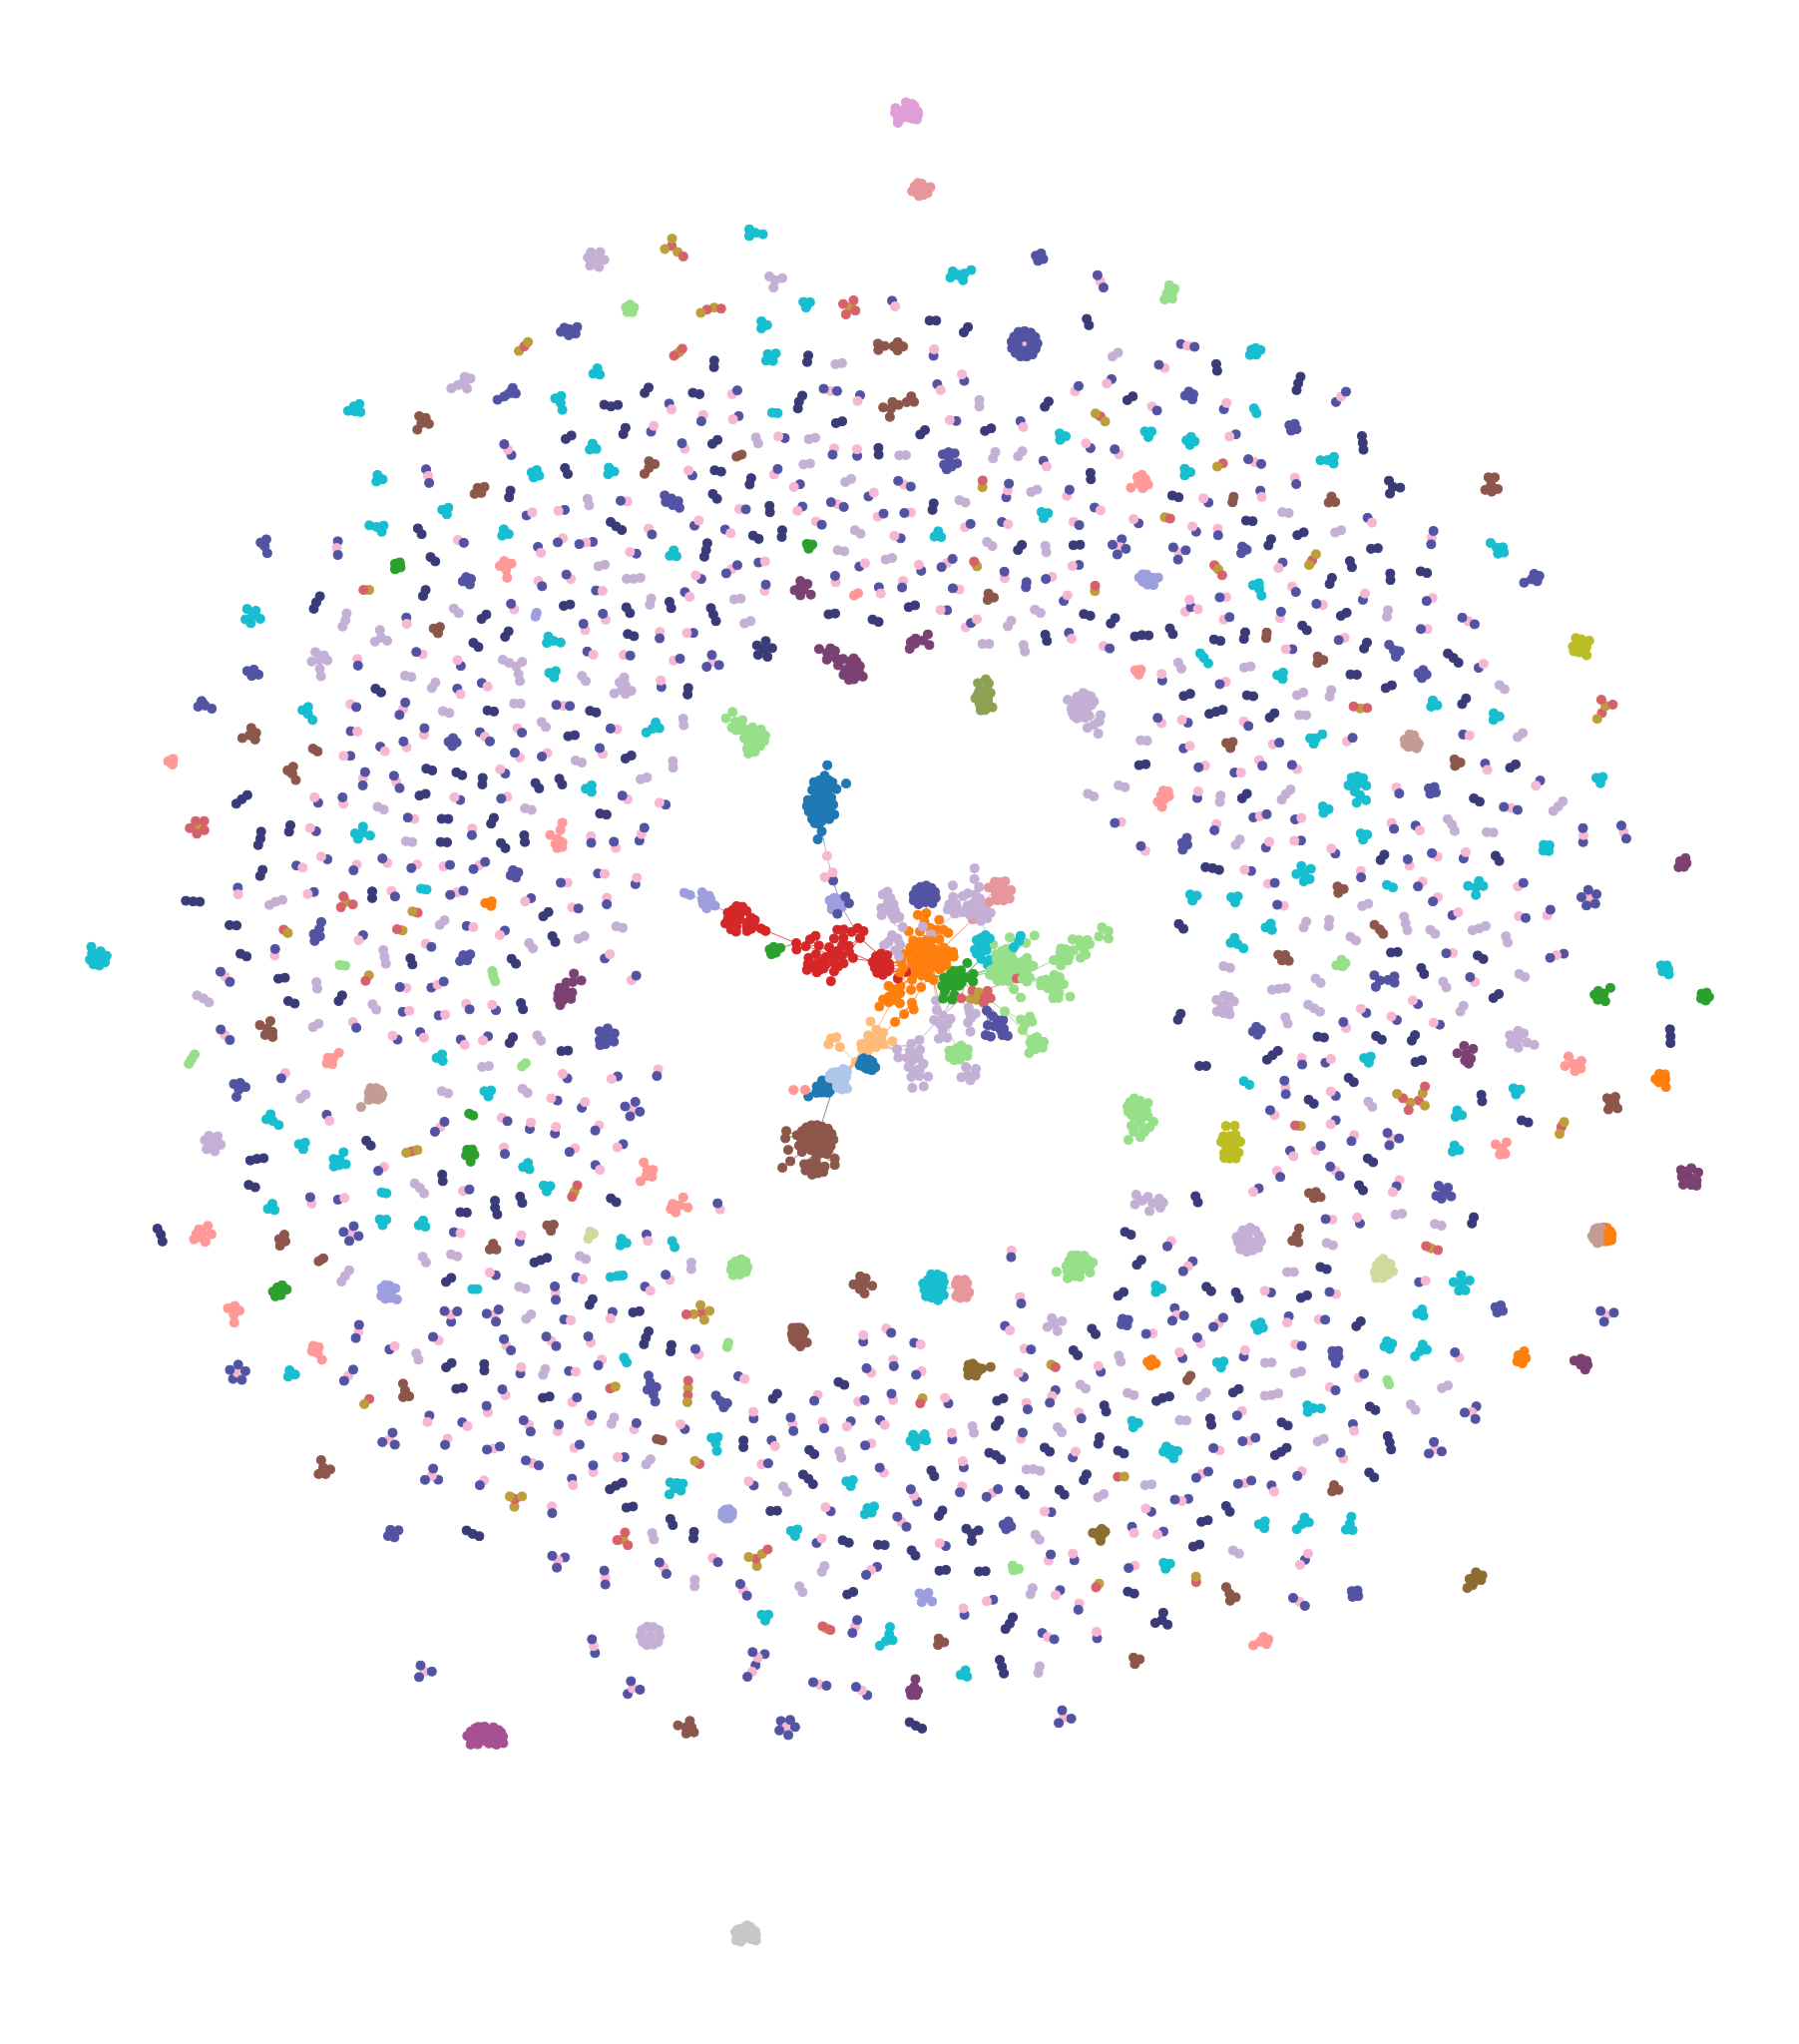

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f33e4497c10, at 0x7f33e44979a0>

In [6]:
state.draw(fmt='png', output_size=(1024, 1024))

In [7]:
start_time = time.time()
state = minimize_nested_blockmodel_dl(G)
end_time = time.time()
print('runtime:', end_time - start_time)
state

runtime: 1.9545369148254395


<NestedBlockState object, with base <BlockState object with 4241 blocks (38 nonempty), degree-corrected, for graph <Graph object, undirected, with 4241 vertices and 12008 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f33e4497c10>, at 0x7f33e44ceaa0>, and 14 levels of sizes [(4241, 38), (38, 8), (8, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f33e4497d90>

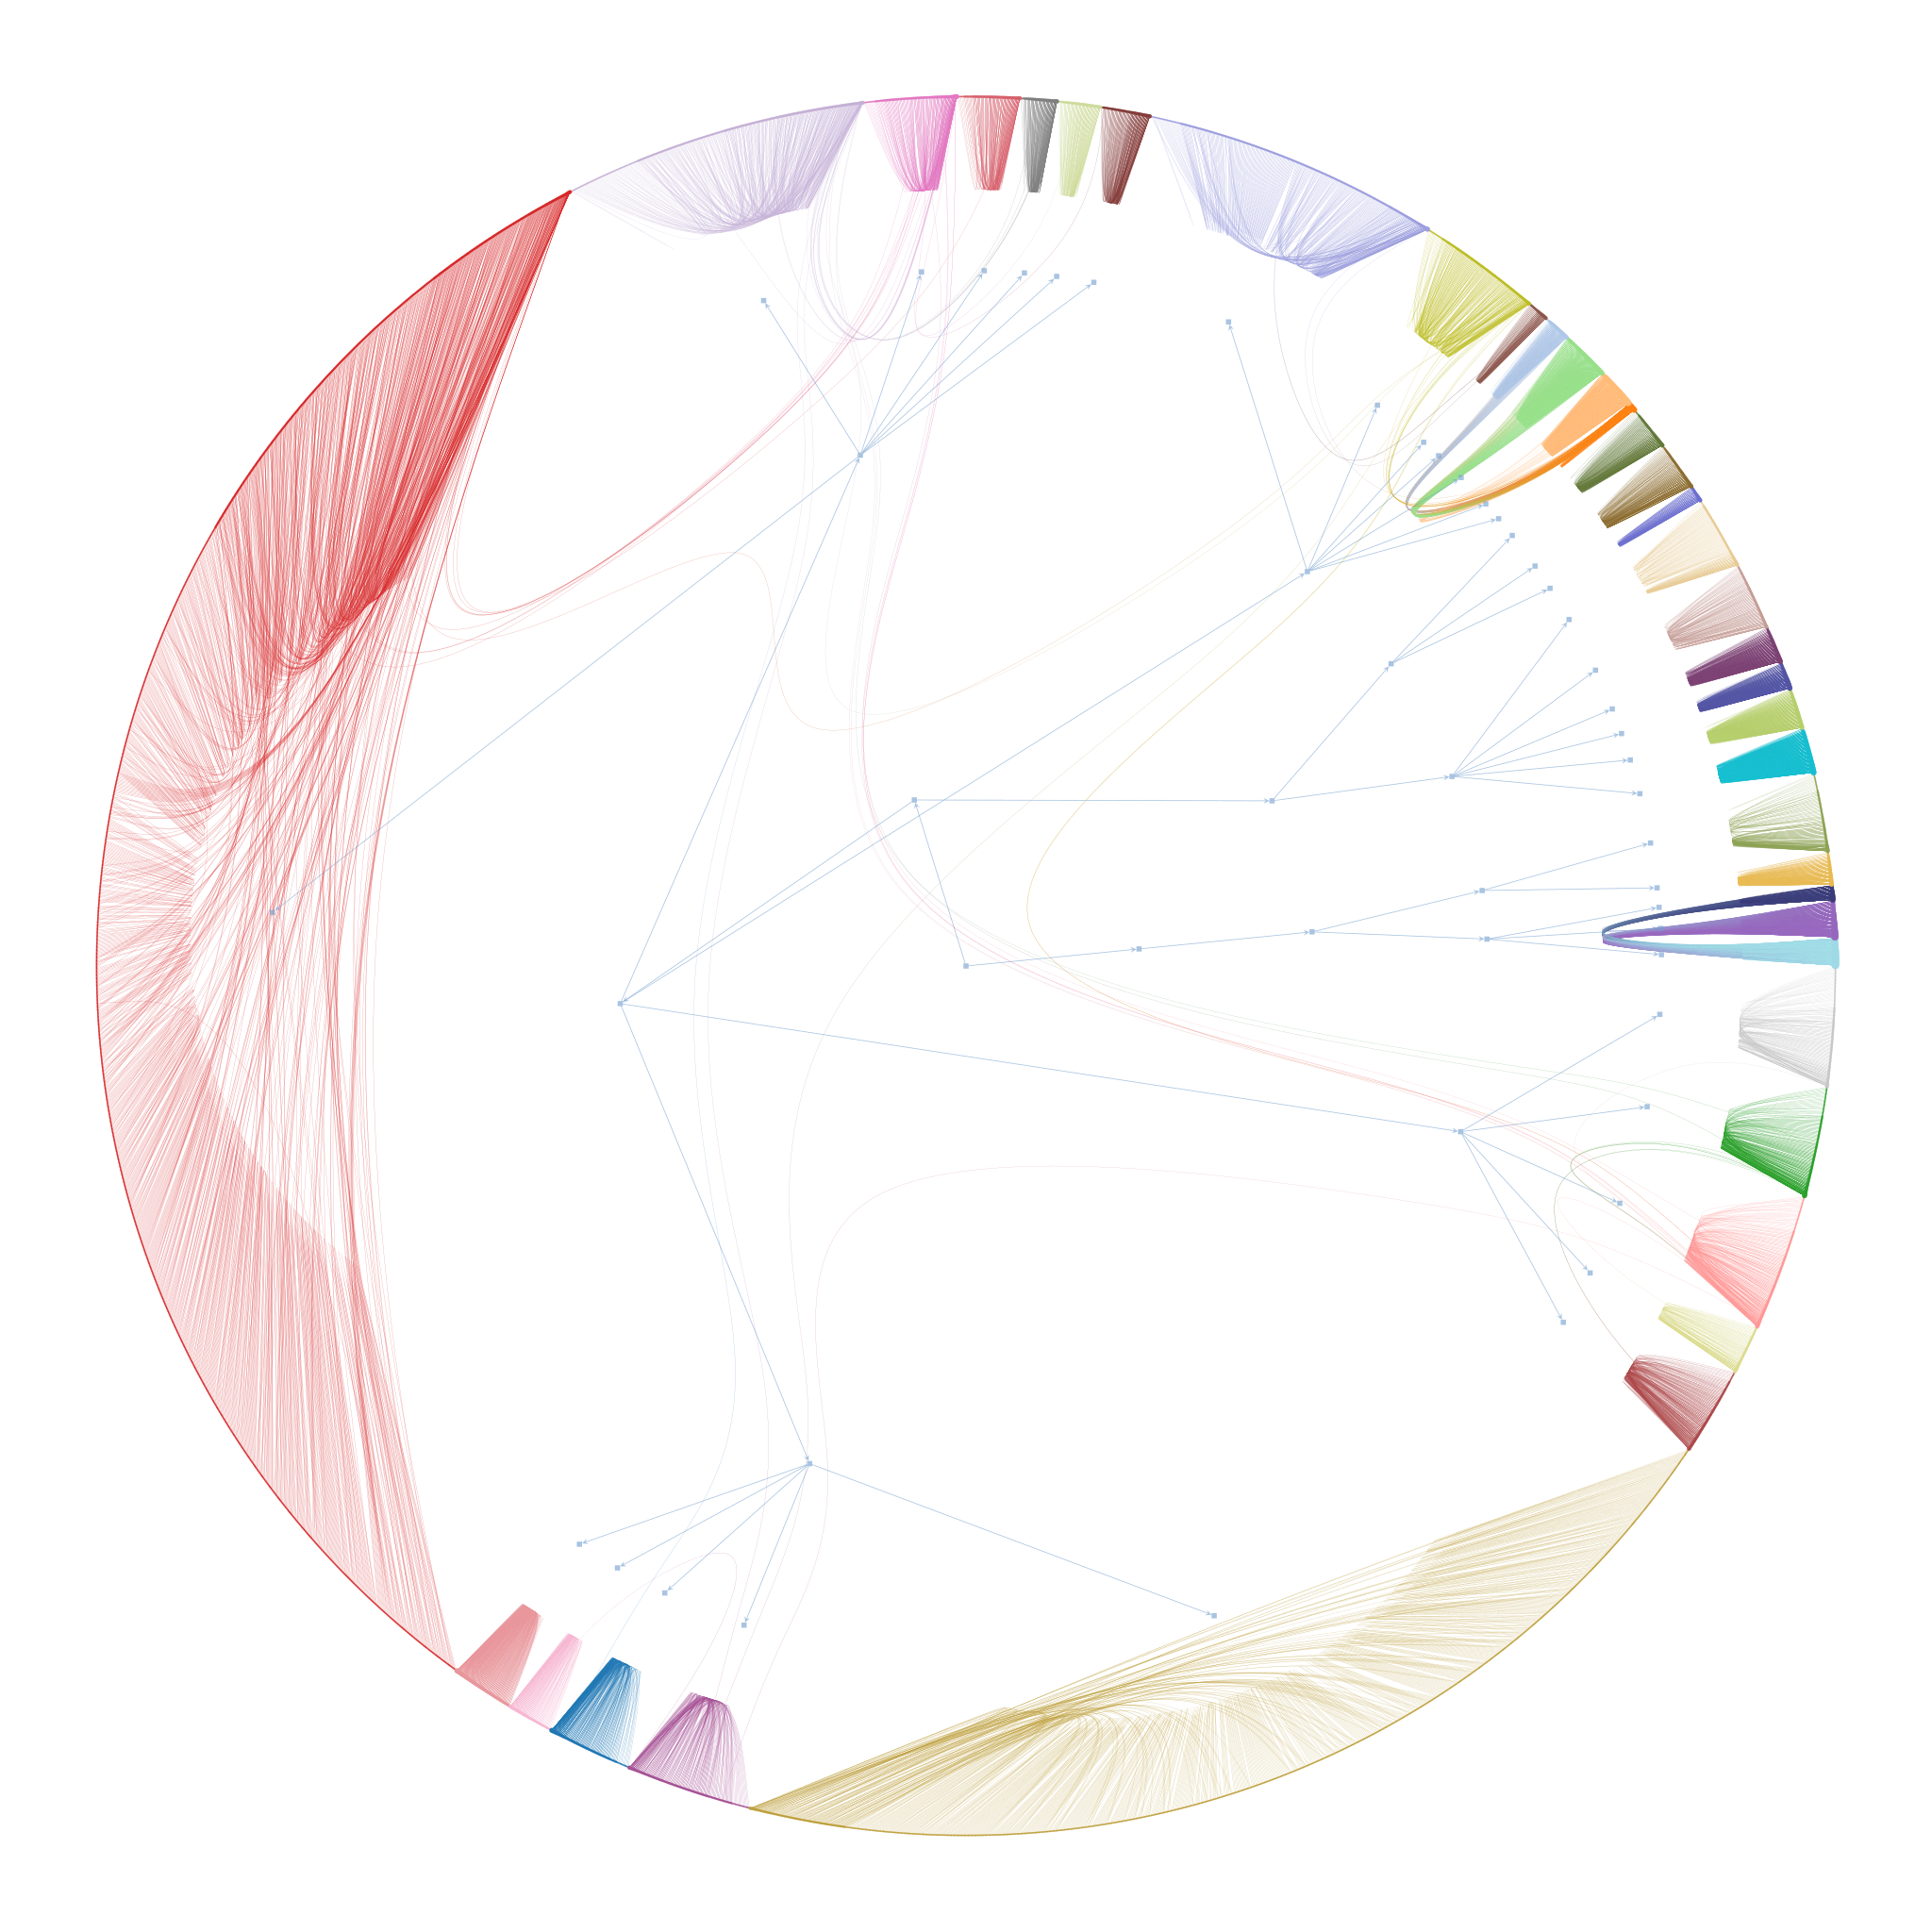

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f33e4497c10, at 0x7f33e4497640>,
 <GraphView object, directed, with 4293 vertices and 4292 edges, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7f33e4497af0, at 0x7f33e451d870>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7f33e4497af0, at 0x7f33e451df90>, at 0x7f33e4497af0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f33e4497af0, at 0x7f33e451e380>)

In [8]:
state.draw(fmt='png', output_size=(1024, 1024))

# Multiple Langauge Community Detection

In [ ]:
start_time = time.time()
G1, _ = load_csv_graph(f"{data_dir}/developers_social_network/PASCAL_developers_social_network.csv", (1, 2), vprop_name='id')
G1.ep['language'] = G1.new_ep('string', val='Pascal')
G2, _ = load_csv_graph(f"{data_dir}/developers_social_network/ASSEMBLY_developers_social_network.csv", (1, 2), vprop_name='id')
G2.ep['language'] = G2.new_ep('string', val='Assembly')
G3, _ = load_csv_graph(f"{data_dir}/developers_social_network/VISUALBASIC_developers_social_network.csv", (1, 2), vprop_name='id')
G3.ep['language'] = G3.new_ep('string', val='VisualBasic')
G, _ = combine_graphs([G1, G2, G3], vprop_name='id')
G.set_directed(False)
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: 1.9201042652130127


<Graph object, undirected, with 20922 vertices and 46379 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f33dc9469e0>

In [15]:
start_time = time.time()
state = minimize_blockmodel_dl(G)
end_time = time.time()
print('runtime:', end_time - start_time)
state

runtime: 9.15060544013977


<BlockState object with 20922 blocks (85 nonempty), degree-corrected, for graph <Graph object, undirected, with 20922 vertices and 46379 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f33dc9469e0>, at 0x7f33e4497eb0>

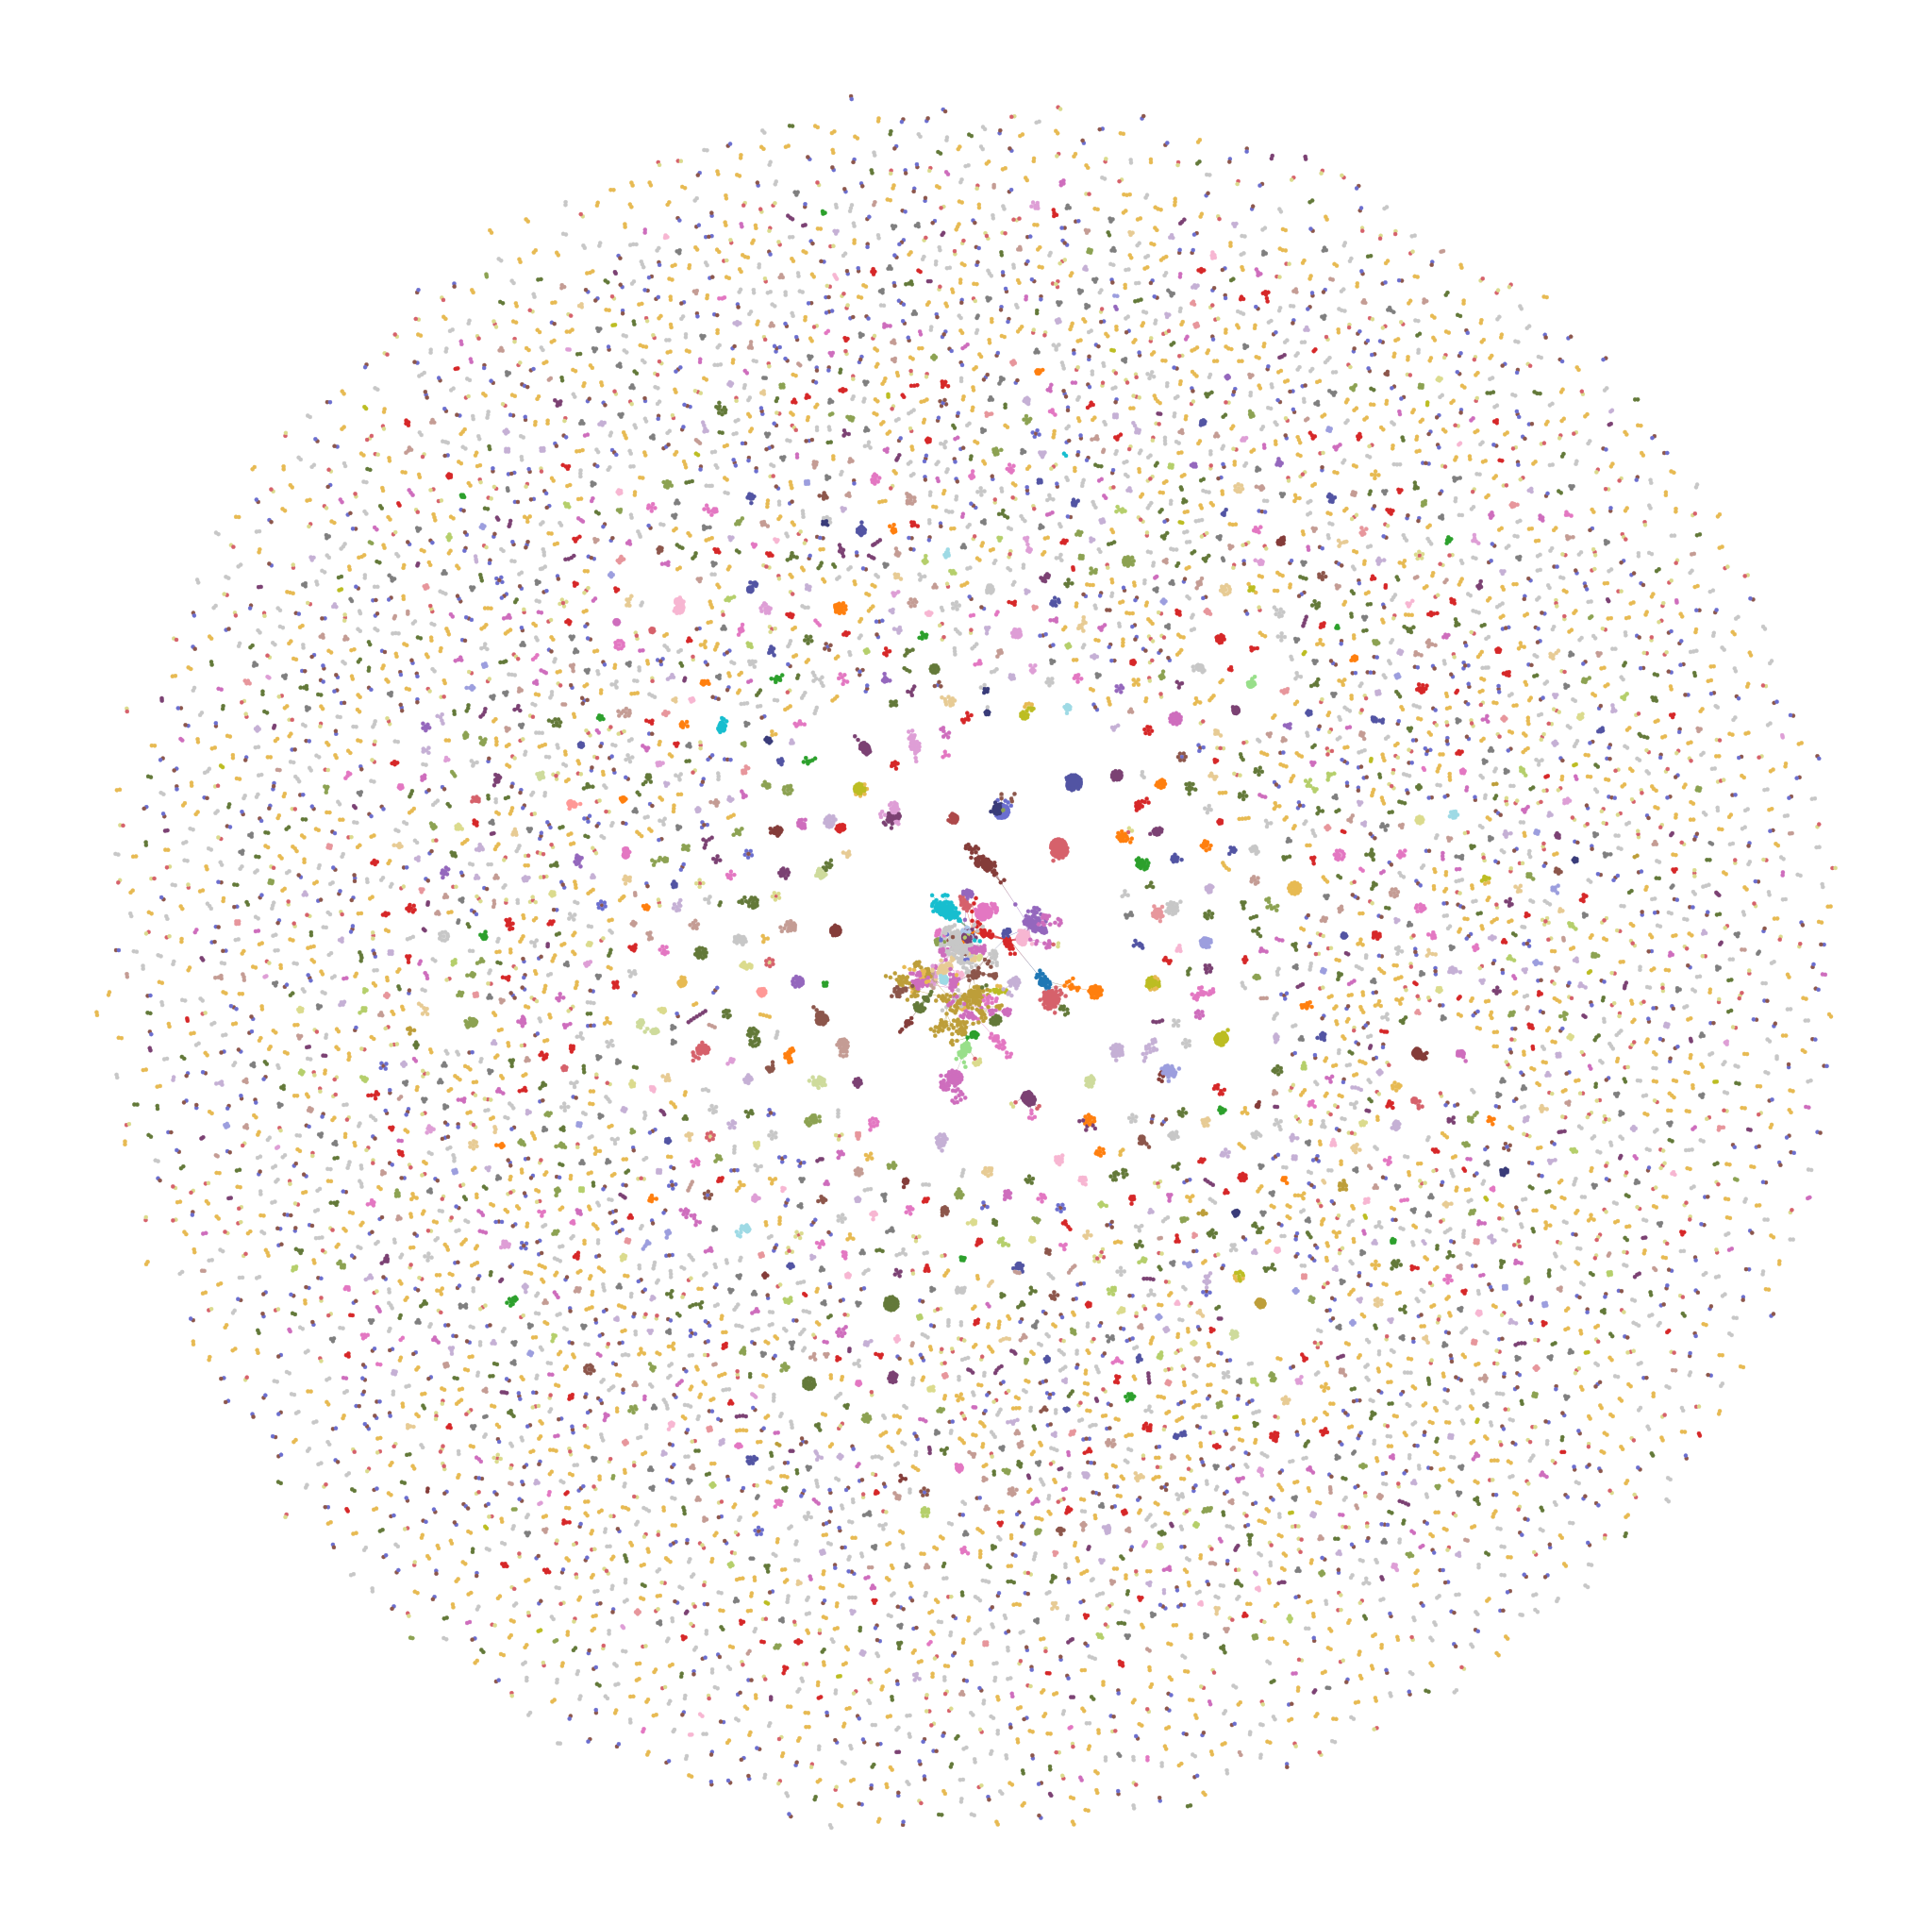

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f33dc9469e0, at 0x7f33d4425bd0>

In [17]:
state.draw(fmt='png', output_size=(1024, 1024))

In [18]:
start_time = time.time()
state = minimize_nested_blockmodel_dl(G)
end_time = time.time()
print('runtime:', end_time - start_time)
state

runtime: 23.587456941604614


<NestedBlockState object, with base <BlockState object with 20922 blocks (268 nonempty), degree-corrected, for graph <Graph object, undirected, with 20922 vertices and 46379 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f33dc9469e0>, at 0x7f33c9fba1a0>, and 16 levels of sizes [(20922, 268), (268, 83), (83, 28), (28, 9), (9, 4), (4, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f33dc8e6530>

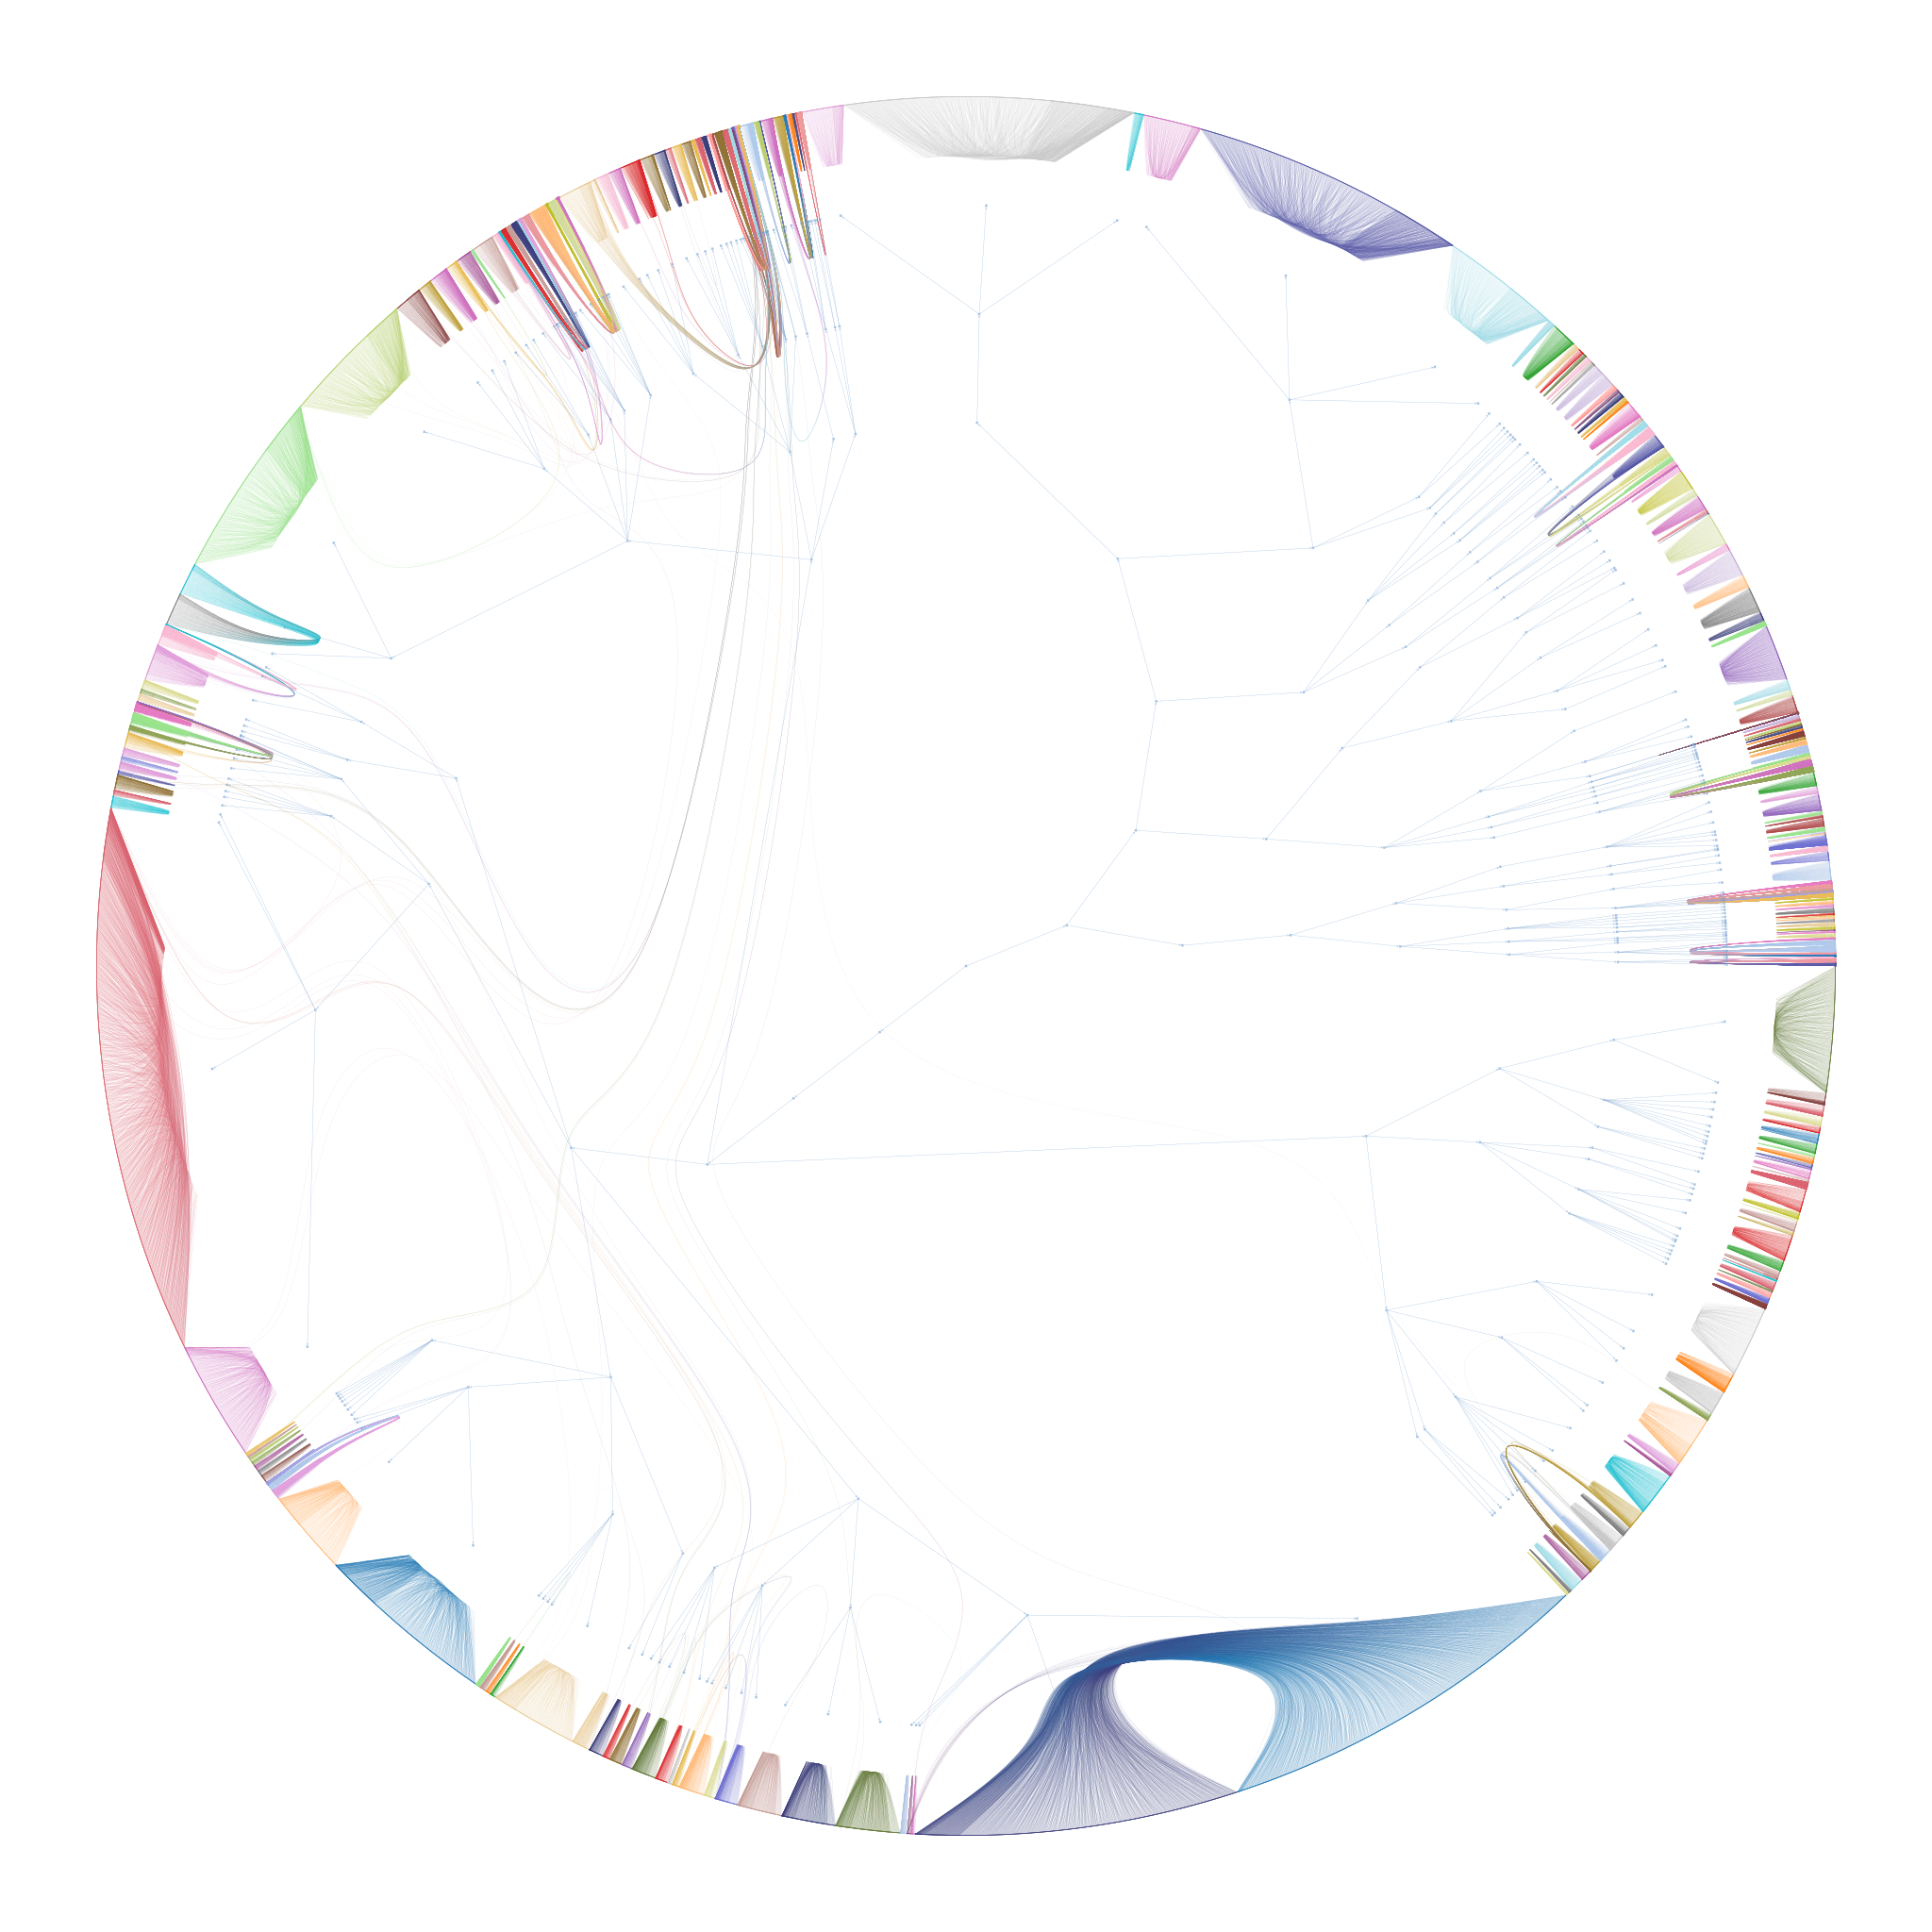

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f33dc9469e0, at 0x7f33dc555fc0>,
 <GraphView object, directed, with 21320 vertices and 21319 edges, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7f33e4497ac0, at 0x7f33c9f9d1b0>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7f33e4497ac0, at 0x7f33c9f9d960>, at 0x7f33e4497ac0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f33e4497ac0, at 0x7f33dc544ac0>)

In [19]:
state.draw(fmt='png', output_size=(1024, 1024))